C:\Users\oronb\AppData\Local\Temp\ipykernel_2692\2108727635.py:24: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(y_filtered, x_filtered)


The area under the graph between 458 and 744 is: 1.594433053486884
The estimated error in the area calculation is: 4.169980832559027e-05


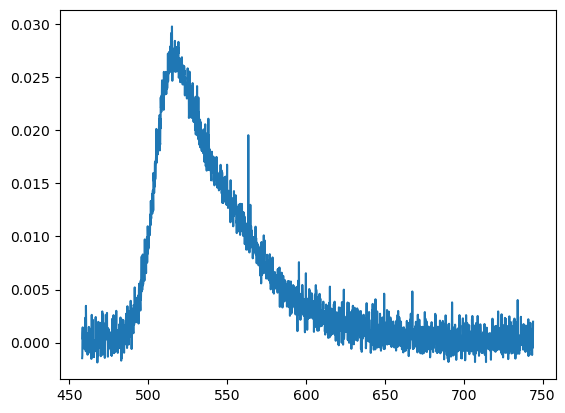

In [3]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Load data from Sheet1
file_path = r"C:\Users\oronb\Downloads\fl, c=0.025.ods"
data = pd.read_excel(file_path, engine='odf', sheet_name='Sheet1')

# Extract X and Y columns
x = data['X [nm (air)]']
y = data['Y [Intensity]']

# Define boundaries (modify these as needed)
x_start = 458    # Lower boundary for X
x_end = 744    # Upper boundary for X

# Filter the data within the specified boundaries
filtered_data = data[(x >= x_start) & (x <= x_end)]
x_filtered = filtered_data['X [nm (air)]']
y_filtered = filtered_data['Y [Intensity]']

# Calculate the area under the curve using the trapezoidal rule
area = simps(y_filtered, x_filtered)

# Estimate the error using the trapezoidal rule error approximation
def trapezoidal_error(y_values, x_values):
    if len(x_values) < 2:
        return 0.0
    h = np.diff(x_values).max()  # Maximum interval size
    second_derivative = np.gradient(np.gradient(y_values, x_values), x_values)
    error = (h**3 / 12) * np.abs(second_derivative).max()
    return error

error = trapezoidal_error(y_filtered.to_numpy(), x_filtered.to_numpy())

print(f"The area under the graph between {x_start} and {x_end} is: {area}")
print(f"The estimated error in the area calculation is: {error}")

plt.plot(x_filtered,y_filtered)
plt.show()